# 3D Transformation Matrices
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [3DTransformation_Matrix.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Computer-Graphics/3DTransformation_Matrix.ipynb)
---
Overview and application of tri-dimensional transformation matrices.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (16, 4)

In [3]:
X, Y, Z = np.mgrid[0:1:5j, 0:1:5j, 0:1:5j]
x, y, z = X.ravel(), Y.ravel(), Z.ravel()

## 1. Translation
---
$$
\large x'=x + t_x \\
\large y'=y + t_y \\
\large z'=z + t_z
$$

using homogeneous matrix

$$ \large
\begin{bmatrix} x' \\ y' \\ z' \\ 1 \end{bmatrix} = \begin{bmatrix} 1 & 0 & 0 & t_x \\ 0 & 1 & 0 & t_y \\ 0 & 0 & 1 & t_z \\ 0 & 0 & 0 & 1 \end{bmatrix}\begin{bmatrix} x \\ y \\ z \\ 1 \end{bmatrix}
$$

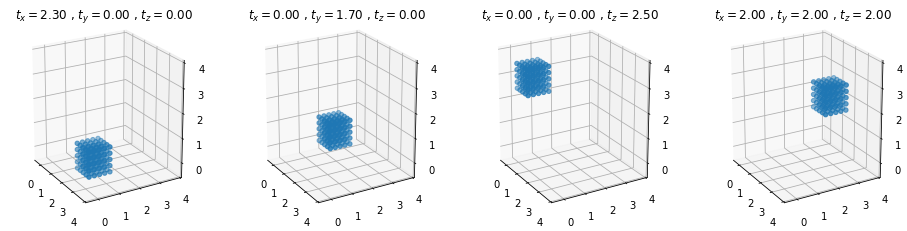

In [4]:
def trans_translate(x, y, z, tx, ty, tz):
    T = [[1, 0, 0, tx],
         [0, 1, 0, ty],
         [0, 0, 1, tz],
         [0, 0, 0, 1 ]]
    T = np.array(T)
    P = np.array([x, y, z, [1]*x.size])
    return np.dot(T, P)

fig, ax = plt.subplots(1, 4, subplot_kw={'projection': '3d'})

T_ = [[2.3, 0, 0], [0, 1.7, 0], [0, 0, 2.5], [2, 2, 2]]

for i in range(4):
    tx, ty, tz = T_[i]
    x_, y_, z_, _ = trans_translate(x, y, z, tx, ty, tz)
    ax[i].view_init(20, -30)
    ax[i].scatter(x_, y_, z_)
    ax[i].set_title(r'$t_x={0:.2f}$ , $t_y={1:.2f}$ , $t_z={2:.2f}$'.format(tx, ty, tz))
    
    ax[i].set_xlim([-0.5, 4])
    ax[i].set_ylim([-0.5, 4])
    ax[i].set_zlim([-0.5, 4])

plt.show()

![translate](output/3DTransform_translate.gif)

## 2. Scaling
---
Relative to the point $(p_x, p_y, p_z)$

$$
\large x'=s_x(x - p_x) + p_x = s_x x + p_x(1 - s_x) \\
\large y'=s_y(y - p_y) + p_y = s_y y + p_y(1 - s_y) \\
\large z'=s_z(z - p_z) + p_z = s_z z + p_z(1 - s_z)
$$

using homogeneous matrix

$$ \large
\begin{bmatrix} x' \\ y' \\ z' \\ 1 \end{bmatrix} = \begin{bmatrix} s_x & 0 & 0 & p_x(1 - s_x) \\ 0 & s_y & 0 & p_y(1 - s_y) \\ 0 & 0 & s_z & p_z(1 - s_z) \\ 0 & 0 & 0 & 1 \end{bmatrix}\begin{bmatrix} x \\ y \\ z \\ 1 \end{bmatrix}
$$

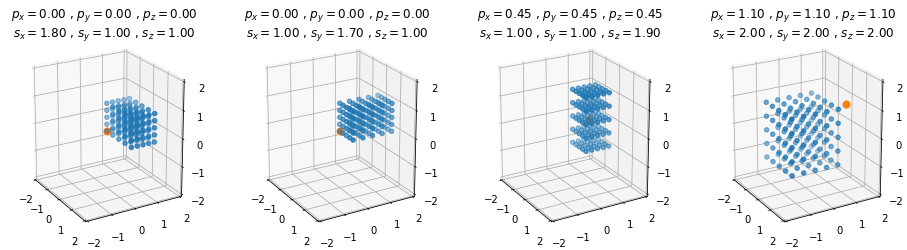

In [5]:
def trans_scale(x, y, z,
                px, py, pz,
                sx, sy, sz):
    T = [[sx, 0 , 0 , px*(1 - sx)],
         [0 , sy, 0 , py*(1 - sy)],
         [0 , 0 , sz, pz*(1 - sz)],
         [0 , 0 , 0 , 1          ]]
    T = np.array(T)
    P = np.array([x, y, z, [1]*x.size])
    return np.dot(T, P)

fig, ax = plt.subplots(1, 4, subplot_kw={'projection': '3d'})

S_ = [[1.8, 1, 1], [1, 1.7, 1], [1, 1, 1.9], [2, 2, 2]]
P_ = [[0, 0, 0], [0, 0, 0], [0.45, 0.45, 0.45], [1.1, 1.1, 1.1]]

for i in range(4):
    sx, sy, sz = S_[i]; px, py, pz = P_[i]
    x_, y_, z_, _ = trans_scale(x, y, z, px, py, pz, sx, sy, sz)
    ax[i].view_init(20, -30)
    ax[i].scatter(x_, y_, z_)
    ax[i].scatter(px, py, pz, s=50)
    ax[i].set_title(
        r'$p_x={0:.2f}$ , $p_y={1:.2f}$ , $p_z={2:.2f}$'.format(px, py, pz) + '\n'
        r'$s_x={0:.2f}$ , $s_y={1:.2f}$ , $s_z={2:.2f}$'.format(sx, sy, sz)
    )
    
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    ax[i].set_zlim([-2, 2])

plt.show()

![scale](output/3DTransform_scale.gif)

## 3. Rotation
---
Relative to the point $(p_x, p_y, p_z)$
$$ \large
R=R_x(\alpha)R_y(\beta)R_z(\gamma)
$$

### 3.1. Rotation around the x-axis
---

$$
\large y'=(y - p_y)\cos\alpha-(z - p_z)\sin \alpha + p_y = y \cos \alpha - z \sin \alpha + p_y(1 - \cos \alpha) + p_z \sin \alpha \\
\large z'=(y - p_y)\sin\alpha+(z - p_z)\cos \alpha + p_z = y \sin \alpha + z \cos \alpha + p_z(1 - \cos \alpha) - p_y \sin \alpha
$$

using homogeneous matrix

$$ \large
\begin{bmatrix} x' \\ y' \\ z' \\ 1 \end{bmatrix} = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & \cos\alpha & -\sin\alpha & p_y(1 - \cos \alpha) + p_z \sin \alpha \\
0 & \sin\alpha & \cos\alpha & p_z(1 - \cos \alpha) - p_y \sin \alpha \\
0 & 0 & 0 & 1
\end{bmatrix}\begin{bmatrix} x \\ y \\ z \\ 1 \end{bmatrix}
$$

### 3.2. Rotation around the y-axis
---

$$
\large x'=(x - p_x)\cos\beta+(z - p_z)\sin \beta + p_x = x \cos \beta + z \sin \beta + p_x(1 - \cos \beta) - p_z \sin \beta \\
\large z'=-(y - p_y)\sin\beta+(z - p_z)\cos \beta + p_z = -x \sin \beta + z \cos \beta + p_z(1 - \cos \beta) + p_x \sin \beta
$$

using homogeneous matrix

$$ \large
\begin{bmatrix} x' \\ y' \\ z' \\ 1 \end{bmatrix} = \begin{bmatrix}
\cos\beta & 0 & \sin\beta & p_x(1 - \cos \beta) - p_z \sin \beta \\
0 & 1 & 0 & 0 \\
-\sin\beta & 0 & \cos\beta & p_z(1 - \cos \beta) + p_x \sin \beta \\
0 & 0 & 0 & 1
\end{bmatrix}\begin{bmatrix} x \\ y \\ z \\ 1 \end{bmatrix}
$$

### 3.3. Rotation around the z-axis
---

$$
\large x'=(x - p_x)\cos\gamma-(y - p_y)\sin \gamma + p_x = x \cos \gamma - y \sin \gamma + p_x(1 - \cos \gamma) + p_y \sin \gamma \\
\large y'=(x - p_x)\sin\gamma+(y - p_y)\cos \gamma + p_y = x \sin \gamma + y \cos \gamma + p_y(1 - \cos \gamma) - p_x \sin \gamma
$$

using homogeneous matrix

$$ \large
\begin{bmatrix} x' \\ y' \\ z' \\ 1 \end{bmatrix} = \begin{bmatrix}
\cos\gamma & -\sin\gamma & 0 & p_x(1 - \cos \gamma) + p_y \sin \gamma \\
\sin\gamma & \cos\gamma & 0 & p_y(1 - \cos \gamma) - p_x \sin \gamma \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}\begin{bmatrix} x \\ y \\ z \\ 1 \end{bmatrix}
$$

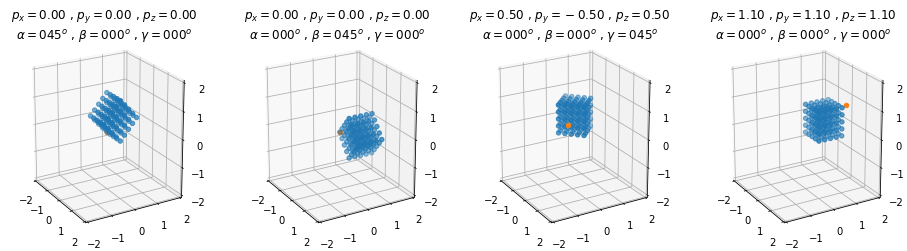

In [6]:
def trans_rotate(x, y, z, px, py, pz, alpha, beta, gamma):
    alpha, beta, gamma = np.deg2rad(alpha), np.deg2rad(beta), np.deg2rad(gamma)
    Rx = [[1, 0            ,  0            , 0                                        ],
          [0, np.cos(alpha), -np.sin(alpha), py*(1 - np.cos(alpha)) + pz*np.sin(alpha)],
          [0, np.sin(alpha),  np.cos(alpha), pz*(1 - np.cos(alpha)) - py*np.sin(alpha)],
          [0, 0            ,  0            , 1                                        ]]
    Ry = [[ np.cos(beta), 0, np.sin(beta), px*(1 - np.cos(beta)) - pz*np.sin(beta)],
          [ 0           , 1, 0           , 0                                      ],
          [-np.sin(beta), 0, np.cos(beta), pz*(1 - np.cos(beta)) + px*np.sin(beta)],
          [ 0           , 0, 0           , 1                                      ]]
    Rz = [[np.cos(gamma), -np.sin(gamma), 0, px*(1 - np.cos(gamma)) + py*np.sin(gamma)],
          [np.sin(gamma),  np.cos(gamma), 0, py*(1 - np.cos(gamma)) - px*np.sin(gamma)],
          [0            ,  0            , 1, 0                                        ],
          [0            ,  0            , 0, 1                                        ]]
    
    Rx = np.array(Rx); Ry = np.array(Ry); Rz = np.array(Rz)
    P = np.array([x, y, z, [1]*x.size])
    return np.dot(np.dot(np.dot(Rx, Ry), Rz), P)

fig, ax = plt.subplots(1, 4, subplot_kw={'projection': '3d'})

R_ = [[45, 0, 0],
      [0, 45, 0],
      [0, 0, 45],
      [0, 0, 0]]
P_ = [[0, 0, 0],
      [0, 0, 0],
      [0.5, -0.5, 0.5],
      [1.1, 1.1, 1.1]]

for i in range(4):
    alpha, beta, gamma = R_[i]; px, py, pz = P_[i]
    x_, y_, z_, _ = trans_rotate(x, y, z, px, py, pz, alpha, beta, gamma)
    ax[i].view_init(20, -30)
    ax[i].scatter(x_, y_, z_)
    ax[i].scatter(px, py, pz)
    ax[i].set_title(
        r'$p_x={0:.2f}$ , $p_y={1:.2f}$ , $p_z={2:.2f}$'.format(px, py, pz) + '\n'
        r'$\alpha={0:03d}^o$ , $\beta={1:03d}^o$ , $\gamma={2:03d}^o$'.format(alpha, beta, gamma)
    )
    
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    ax[i].set_zlim([-2, 2])

plt.show()

![rotate](output/3DTransform_rotate.gif)

## 4. Shearing
---
Relative to the point $(p_x, p_y, p_z)$

$$
\large x' = x + \lambda_x^y(y - p_x) + \lambda_x^z(z - p_x) = x + \lambda_x^y y + \lambda_x^z z - (\lambda_x^y + \lambda_x^z) p_x\\
\large y' = y + \lambda_y^x(x - p_y) + \lambda_y^z(z - p_y) = y + \lambda_y^x x + \lambda_y^z z - (\lambda_y^x + \lambda_y^z) p_y\\
\large z' = z + \lambda_z^x(x - p_z) + \lambda_z^y(y - p_z) = z + \lambda_z^x x + \lambda_z^y y - (\lambda_z^x + \lambda_z^y) p_z
$$

using homogeneous matrix

$$ \large
\begin{bmatrix} x' \\ y' \\ z' \\ 1 \end{bmatrix} =\begin{bmatrix} 
1 & \lambda_x^y & \lambda_x^z & -(\lambda_x^y + \lambda_x^z) p_x \\
\lambda_y^x & 1 & \lambda_y^z & -(\lambda_y^x + \lambda_y^z) p_y \\
\lambda_z^x & \lambda_z^y & 1 & -(\lambda_z^x + \lambda_z^y) p_z \\
0 & 0 & 0 & 1 \end{bmatrix}\begin{bmatrix} x \\ y \\ z \\ 1 \end{bmatrix}
$$

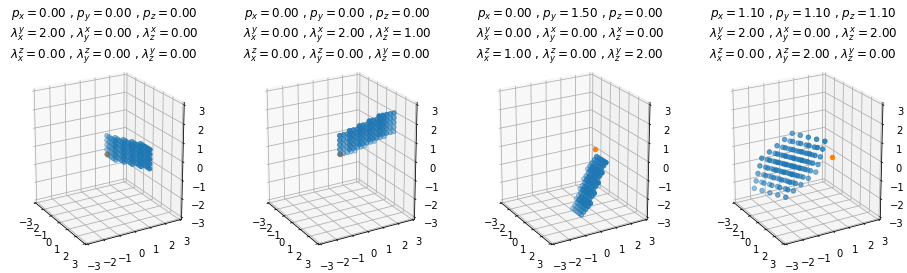

In [7]:
def trans_shear(x, y, z, px, py, pz,
                lambdaxy, lambdaxz,
                lambdayx, lambdayz,
                lambdazx, lambdazy):
    T = [[1       , lambdaxy, lambdaxz, -(lambdaxy+lambdaxz)*px],
         [lambdayx, 1       , lambdayz, -(lambdayx+lambdayz)*py],
         [lambdazx, lambdazy, 1       , -(lambdazx+lambdazy)*py],
         [0       , 0       , 0       , 1                      ]]
    T = np.array(T)
    P = np.array([x, y, z, [1]*x.size])
    return np.dot(T, P)

fig, ax = plt.subplots(1, 4, subplot_kw={'projection': '3d'})

L_ = [[[2, 0], [0, 0], [0, 0]],
      [[0, 0], [2, 0], [1, 0]],
      [[0, 1], [0, 0], [0, 2]],
      [[2, 0], [0, 2], [2, 0]]]
P_ = [[0, 0, 0], [0, 0, 0], [0, 1.5, 0], [1.1, 1.1, 1.1]]

for i in range(4):
    lambdax, lambday, lambdaz = L_[i]; px, py, pz = P_[i]
    x_, y_, z_, _ = trans_shear(x, y, z, px, py, pz,
                                *lambdax, *lambday, *lambdaz)
    ax[i].view_init(20, -30)
    ax[i].scatter(x_, y_, z_)
    ax[i].scatter(px, py)
    ax[i].set_title(
        r'$p_x={0:.2f}$ , $p_y={1:.2f}$ , $p_z={2:.2f}$'.format(px, py, pz) + '\n'
        r'$\lambda_x^y={0:.2f}$ , $\lambda_y^x={1:.2f}$ , $\lambda_z^x={2:.2f}$'.format(lambdax[0], lambday[0], lambdaz[0]) + '\n'
        r'$\lambda_x^z={0:.2f}$ , $\lambda_y^z={1:.2f}$ , $\lambda_z^y={2:.2f}$'.format(lambdax[1], lambday[1], lambdaz[1])
    )

    ax[i].set_xlim([-3, 3])
    ax[i].set_ylim([-3, 3])
    ax[i].set_zlim([-3, 3])

plt.show()

![shear](output/3DTransform_shear.gif)